 ### Title: INET 4061: Lab 3
 ### Author: Quentin Smith
 ### Date: 2/9/20

# 1. Overview

### Purpose
The purpose of this notebook is to display the ability to create a Jupyter Notebook, compare the mean across levels of one categorical variable using a one way ANOVA test, and communicate understanding of the material and what the data means. 


### One-Way ANOVA test
Analysis of Variance (ANOVA) uses F-tests to statistically assess the equality of means when you have three or more groups [1]. 

Data Assumptions and Requirements [2]:
1. The dependent variable is normally distributed in each group
2. There is homogeniety of variances
3. Independence of observation 

The null hypothesis of a One-Way ANOVA test is as follows:

$H_0: \mu_1 =\mu_2 =....= \mu_k$

So the alternative hypothesis is there is at least two group mean which are statistically significantly different. 

The One-Way Anova Test is omnibus which means it cannot indicate which two group means are different. To determine this a post-hoc test needs to be run. 

To accept the null hyopthesis the p-value > 0.05 which shows there are no statistially significant differences between group means. If below 0.05 there is a statistically significant difference between group means. 

### F-Test and F-Statistics
The F-Test is the ratio of two variances and it was named after Sir Ronald Fisher [1].

The F-test in a One-Way ANOVA calulates the F-statistic which is $F =$ (between-group variance) $/$ (within-group variance)

The ideal number to get in an F-statistic since the null hypothesis is for the means to be equal is 1. The F-statistic is compared to F-distribution tables crical F value which takes into account the degrees of freedom for both the between-group variance and the within-group variance. If the F-statistic is larger than the critical value we reject the null hypothesis. 

The larger our f-statistic the larger the between group variance which indicates the differences between population means is not due to random sampling within group but most likely differences between population groups. 

References and Further Information: 
1. F-test in ANOVA https://statisticsbyjim.com/anova/f-tests-anova/
2. One-way Anova https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php
3. SPSS Tutorials: One Way Anova https://libguides.library.kent.edu/SPSS/OneWayANOVA
4. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html
5. Tukey Test https://www.statisticshowto.datasciencecentral.com/tukey-test-honest-significant-difference/

# 2. Data

Python Code from 
1. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

### Accepting the Null Hypothesis
We will start by generating fake data for voter age and demographic data and running a quick one way ANOVA test on it to see if further data exploration can take place.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

Looking up a f-distribution table with $\alpha$ = 0.05 we have an critical f value of 2.379. 


The output shows an F-statistic= 1.77447 and a pvalue= 0.13173 which means there is no significant difference between the means 
of each group. 

### Rejecting the Null Hypothesis

This time around we will use a different distribution for white ages while using the same distibution for the other 4 populations (asian, black, hispanic, other)

In [ ]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

Using the same critical value as before we have critical f-value of 2.379. We see the f-statistic is greater than the critical value and the p value is less than 0.05. 

So with an output of F-statistic= 1.77447 and a pvalue= 0.13173 there is a significant difference between the means of at least two groups.

# 3. Exploratory Data Analysis

We have found a data set which has a siginicant difference between the means of at least two groups. As dicussed in the overview we know ANOVA is omnibus so there is no way to know which groups differ (in this case it is the white group since we used a seperate distribution). 

### Seperate T-Tests and Bonferroni Correction
One post-hoc test we can run to determine which populations differ is to run seperate t-test for each pair of groups. 

In [ ]:
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))    

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


The p-value results suggest there is a difference between the mean age of white voters from the other groups. There is a problem that arises when doing multiple comparison test; creating a greater chance that unlikely results occur. To adjust for this we divide the significance level of 5% by the number of comparisons made. So $ 0.05 / 10 = 0.005$ or less. The adjustment is called **Bonferroni Correction**. The Bonferroni correction is a conservative approach to account for the multiple comparisons problems that may end up rejecting results that are actually significant [4]. By taking this correction into consideration the data shows there is a statistically significant difference between group white and black, group white and mexican, and group white and other. 

### Tukey's Test
There is another common post hoc test called **Tukey's Test**. The assumptions for this test are [5]:
- Observations are independent within and among the group
- The groups for each mean in the test are normally distributed
- Homogeneity of variance

These assumptions line up with the assumptions for the one way ANOVA test which makes this an easy choice for a post hoc test.
If your data does not meet the homogeneity of variances assumption a different test should be chosen. 

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-0.8032,0.9,-3.4423,1.836,False
asian,hispanic,0.4143,0.9,-2.1011,2.9297,False
asian,other,-1.0645,0.8852,-4.2391,2.11,False
asian,white,1.9547,0.175,-0.4575,4.3668,False
black,hispanic,1.2175,0.2318,-0.386,2.821,False
black,other,-0.2614,0.9,-2.7757,2.253,False
black,white,2.7579,0.001,1.3217,4.194,True
hispanic,other,-1.4789,0.4391,-3.863,0.9053,False
hispanic,white,1.5404,0.004,0.3468,2.734,True
other,white,3.0192,0.0028,0.7443,5.2941,True


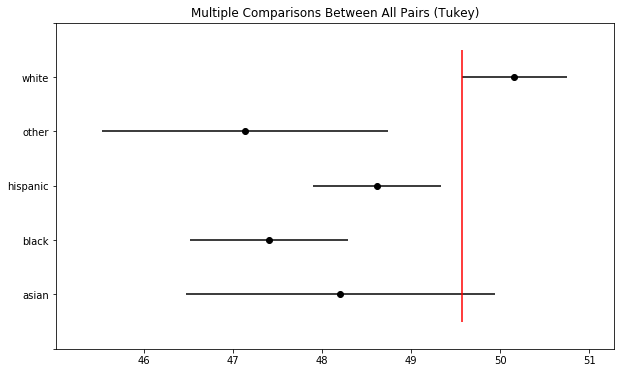

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

The Tukey test suggests we reject the null hypothesis for 3 groups. The white group is part of all three of these groups suggesting the white group is likely different from the others. This aligns with what the seperate T-tests suggested from before. 

# 4. Further Exploratory Analysis

Since I am a little bit new to data analysis using Jupyter Notebooks I am going to just look at the first 20 outputs using head. I see that there are two columns after using melt: race and age. 

In [ ]:
voter_frame.head(20)

,race,age
0,black,54
1,white,51
2,hispanic,53
3,white,50
4,asian,51
5,white,42
6,white,53
7,asian,46
8,white,41
9,black,40


Looking into some other functions I found a describe function which gives me descriptive analysis on the dataframe. It shows there are 1000 counts, with a mean age of 49.14. Which looks to align with our Tukey comparison showing the means for each group. 

In [ ]:
voter_frame.describe()

,age
count,1000.00000
mean,49.14100
std,5.72205
min,29.00000
25%,45.00000
50%,49.00000
75%,53.00000
max,72.00000


Because it is a bit tedious to look through all the data to make sure there is valid data I am going to run some quick tests on the data frame. The first test I'll run is to make sure there are no nulls. To double check I will run a count function which will return the count of entries excluding nulls. 

In [ ]:
voter_frame.count()

race    1000
age     1000
dtype: int64

Since we ran the descriptive analysis on the whole data set. I want to see the descriptive analysis for each group. So I will create a box and whisker chart for each group

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

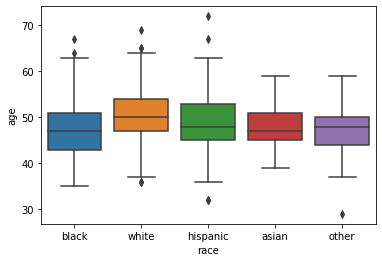

In [ ]:
sns.boxplot(x="race", y="age", data= voter_frame)

Not much of a difference can be seen from the above chart. It does give us some info on the spread of each groups data. 

# Conclusion

After running the one way ANOVA test we reject the Null Hypothesis and show there is statistically significant differences in the average age between three groups: white and black, white and hispanic and white and other. 

Through this project I learned about one-way ANOVA tests, f-test and f-statistics, bonferroni correction when running seperate t-test, tukey test and when to apply it. I practiced and learned multiple skills while creating this notebook inlcuding using pandas, and NumPy. 

The biggest thing I learned during this project is the actual difficulties when analyzing data. The hard part is knowing what to do with the data and how to communicate it. I am still unsure with what I was supposed to put into a models section if I included one. I don't know what is important to mention or not. I haven't even mentioned the outliers in the boxplot I made or whether or not I am supposed to exclude those points. There is a lot more independent thinking while doing data analysis than I thought. 